The goal of this notebook is to plot the expected percent correct as a function of time for various values of:
- coherence
- stdev of diffusion

The DDM equation used is:
$$dy_t=kdt+\sigma dW_t$$

At interrogation time $t$, $y_t\sim \mathcal{N}(kt, t\sigma^2)$.
Therefore, $$P(Correct | t, k, \sigma) = 1-\Phi_{|k|t, t\sigma^2}(0)$$
This is the equation used for the plots below.

In [1]:
import matplotlib.pyplot as plt
import scipy.stats as sp
import numpy as np

In [2]:
def Phi(x,s):
    return sp.norm.cdf(0, loc=x, scale=s) # alternatively return sp.norm.cdf(-x/s)   if x>0

In [3]:
coherences = [.1,.5,1]
stdevs = [1, 2]
%matplotlib inline

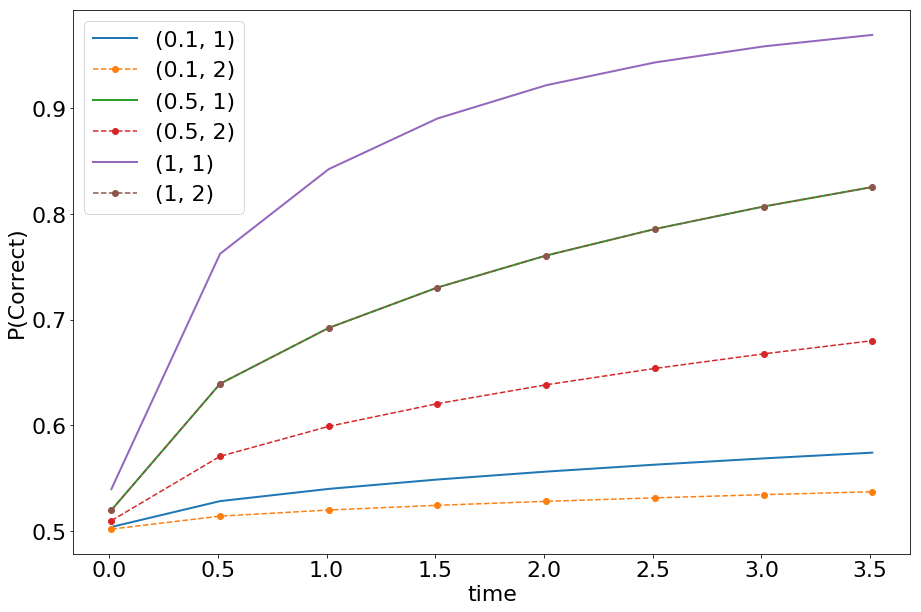

In [4]:
times = np.arange(.01, 4, .5)
fig = plt.figure(figsize=(15,10))
plt.rcParams.update({'font.size': 22})
y = {}
for c in coherences:
    for s in stdevs:
        y[(c, s)] = [1-Phi(c * t, np.sqrt(t)*s) for t in times]
        if s == 1:
            plt.plot(times, y[(c, s)], linewidth=2, label=str((c,s)))
        else:
            plt.plot(times, y[(c, s)], 'o--', label=str((c,s)))
plt.xlabel('time')
plt.ylabel('P(Correct)')
plt.legend()

It appears that some nondimentionalization is possible, whereby only $\sigma/k$ matters. This warrants some mathematical checks.

Note also that, although the bottom crves seem _linear_, by zooming out on the time axis one notices that they really still follow the same shape as the top curves. I wonder what is the mapping from one curve to the other. More precisely, I wonder whether rescaling time for each curve appropriately suffices to make them all overlap...

In [ ]:
# sanity check
k=3
s=2
a=sp.norm.cdf(0, loc=k, scale=s)
b=sp.norm.cdf(-k, loc=0, scale=s)
c=sp.norm.cdf(-k/s, loc=0, scale=1)
d=sp.norm.cdf(-k/s)
print(a, b, c, d)

I am now convinced that the previous paragraph is true. So, really, there is a single shape beneath all the curves above, up to rescaling of time.

Text(0.5, 1.0, 'standard shape')

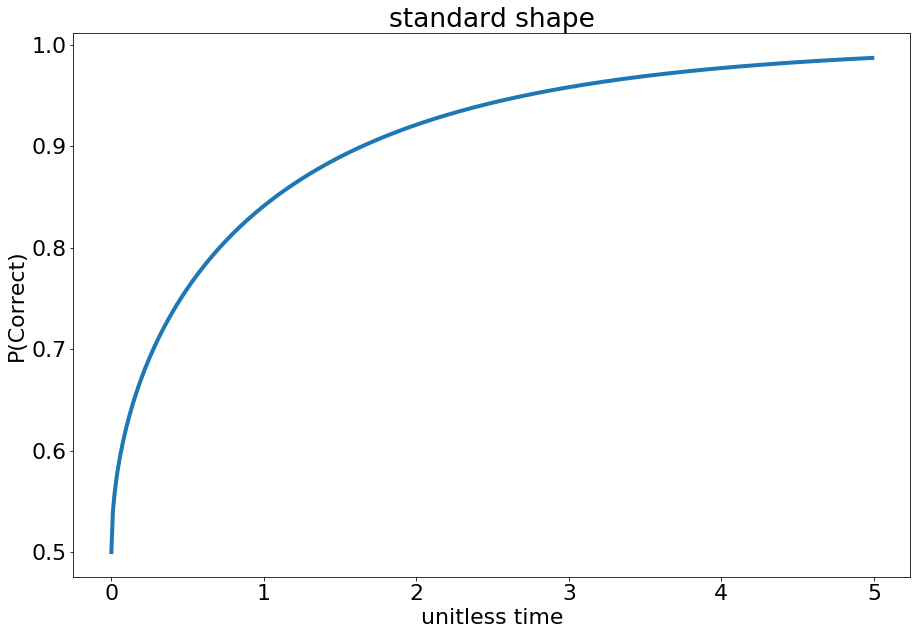

In [5]:
fig = plt.figure(figsize=(15,10))
plt.rcParams.update({'font.size': 22})
t=np.arange(0, 5, .01)
y=1-np.array([1-Phi(-np.sqrt(tt), 1) for tt in t])
plt.plot(t, y, linewidth=4)
plt.xlabel('unitless time')
plt.ylabel('P(Correct)')
plt.title('standard shape')

So, the methodology with real data on the standard dots task could be something as follows:
1. plot P(Correct) as function of VD
2. fit a curve like the one above to the data, with a single free paramater: rescaling factor of time
3. this fit gives us an estimate of $k/\sigma$.

How to estimate goodness of fit? Note that an alternative model keeps the variance fixed. It would be interesting to see which model fits the data better.